In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_customers : pd.DataFrame = pd.read_csv('data/Customers.csv')
df_products : pd.DataFrame = pd.read_csv('data/Products.csv')
df_transactions : pd.DataFrame = pd.read_csv('data/Transactions.csv')

In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [ ]:
df_products.iloc[:, :-1].describe()

,ProductID,ProductName,Category
count,100,100,100
unique,100,66,4
top,P001,ActiveWear Smartwatch,Books
freq,1,4,26


In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [ ]:
prod_quantity : pd.Series = df_transactions.groupby('ProductID')['Quantity'].sum()
df_products['Quantity'] = df_products['ProductID'].map(prod_quantity)
df_products['Total_Sales'] = df_products['Price'] * df_products['Quantity']

df_prod_categories : pd.DataFrame = df_products.groupby('Category').agg({'ProductID': 'count', 'Price': 'mean', 'Quantity': 'sum', 'Total_Sales': 'sum'})
df_prod_categories.rename(
    columns={'ProductID': 'No_of_Products',
             'Price':'Avg_Price',
             'Quantity': 'Total_Quantity_Sold',
             'Total_Sales': 'Total_Sales'},
    inplace=True)
df_prod_categories

,No_of_Products,Avg_Price,Total_Quantity_Sold,Total_Sales
Category,,,,
Books,26,292.212308,681,192147.47
Clothing,25,263.720000,590,166170.66
Electronics,26,275.353462,627,180783.50
Home Decor,23,235.020000,639,150893.93


In [ ]:
df_customers['No_of_Transactions'] = df_customers['CustomerID'].map(df_transactions['CustomerID'].value_counts())

df_customers['No_of_Transactions'] = df_customers['No_of_Transactions'].fillna(0)
df_customers['No_of_Transactions'] = df_customers['No_of_Transactions'].astype(int)

df_customers['TotalSpending'] = df_customers['CustomerID'].map(df_transactions.groupby('CustomerID')['TotalValue'].sum()).fillna(0)


df_customers_from_region : pd.DataFrame = df_customers.groupby('Region').agg({'CustomerID': 'count', 'No_of_Transactions': 'sum', 'TotalSpending': 'sum'})
df_customers_from_region.rename(
    columns={'CustomerID': 'No_of_Customers',
             'No_of_Transactions': 'Total_Transactions',
             'TotalSpending': 'Total_Spending'},
    inplace=True)
df_customers_from_region['Avg_Transactions'] = df_customers_from_region['Total_Transactions'] / df_customers_from_region['No_of_Customers']
df_customers_from_region['Avg_Spending'] = df_customers_from_region['Total_Spending'] / df_customers_from_region['No_of_Customers']
# #  we will add 2 more columns representing the month in which most spending was done and the month in which most transactions were made
# df_customers_from_region['MonthWithMostSpending'] = df_customers_from_region.index.map(

In [ ]:
TransactionDate : pd.Series = pd.to_datetime(df_transactions['TransactionDate'])
df_transactions['TransactionDate'] = TransactionDate.dt.date
df_transactions['TransactionDay'] = TransactionDate.dt.day_name()
df_transactions['TransactionTime'] = TransactionDate.dt.time
df_transactions['TransactionMonth'] = TransactionDate.dt.month_name()
df_transactions


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,TransactionDay,TransactionTime,TransactionMonth
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,Sunday,12:38:23,August
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,Monday,22:23:54,May
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,Thursday,07:38:55,April
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,Tuesday,22:55:37,March
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,Thursday,15:10:10,March
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24,1,459.86,459.86,Thursday,08:30:27,October
996,T00759,C0059,P037,2024-06-04,3,1379.58,459.86,Tuesday,02:15:24,June
997,T00922,C0018,P037,2024-04-05,4,1839.44,459.86,Friday,13:05:32,April
998,T00959,C0115,P037,2024-09-29,2,919.72,459.86,Sunday,10:16:02,September


In [ ]:
# df_agg = df_transactions.groupby(['CustomerID', 'TransactionMonth']).agg(
#     {
#         'TransactionID': 'count',
#         'TotalValue': 'sum'
#     }
# )

In [ ]:
# df_customers['MonthWithMostTransactions'] = df_customers['CustomerID'].map(
#     df_transactions.groupby('CustomerID')['TransactionMonth']
#     .agg(lambda x: x.mode().iloc[0])
# )
# df_customers['MonthWithHighestSpending'] = df_customers['CustomerID'].map(
#     df_transactions.groupby(['CustomerID', 'TransactionMonth'])['TotalSpending']
#     .sum()
#     .groupby('CustomerID')
#     .idxmax()
#     .apply(lambda x: x[1])  # Extract the month part of the tuple (CustomerID, Month)
# )
# df_customers

In [ ]:
def get_transaction_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

df_transactions['Transaction_TimePeriod'] = df_transactions['TransactionTime'].apply(lambda x: get_transaction_time(x.hour))
df_transactions


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,TransactionDay,TransactionTime,TransactionMonth,Transaction_TimePeriod
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,Sunday,12:38:23,August,Afternoon
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,Monday,22:23:54,May,Evening
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,Thursday,07:38:55,April,Morning
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,Tuesday,22:55:37,March,Evening
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,Thursday,15:10:10,March,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24,1,459.86,459.86,Thursday,08:30:27,October,Morning
996,T00759,C0059,P037,2024-06-04,3,1379.58,459.86,Tuesday,02:15:24,June,Evening
997,T00922,C0018,P037,2024-04-05,4,1839.44,459.86,Friday,13:05:32,April,Afternoon
998,T00959,C0115,P037,2024-09-29,2,919.72,459.86,Sunday,10:16:02,September,Morning


In [ ]:


df_customers['AvgTransactionValue'] = df_customers['CustomerID'].map(df_transactions.groupby('CustomerID')['TotalValue'].mean())
df_customers['DaysSinceLastTransaction'] = df_customers['CustomerID'].map(
    df_transactions.groupby('CustomerID')['TransactionDate']
    .agg(lambda x: (pd.Timestamp.today() - pd.to_datetime(x.max())).days)
)
df_customers['UniqueProductsPurchased'] = df_customers['CustomerID'].map(
    df_transactions.groupby('CustomerID')['ProductID']
    .nunique()
)
df_customers['FavProduct'] = df_customers['CustomerID'].map(
    df_transactions.groupby('CustomerID')['ProductID']
    .agg(lambda x: x.mode().iloc[0])
)
df_customers['FavCategory'] = df_customers['CustomerID'].map(
    df_all.groupby('CustomerID')['Category']
    .agg(lambda x: x.mode().iloc[0])
)
df_customers['MostActiveTransactionDay'] = df_customers['CustomerID'].map(
    df_transactions.groupby('CustomerID')['TransactionDay']
    .agg(lambda x: x.mode().iloc[0])
)
df_customers['PeakTransactionTime'] = df_customers['CustomerID'].map(
    df_transactions.groupby('CustomerID')['Transaction_TimePeriod']
    .agg(lambda x: x.mode().iloc[0])  # Get the most common (mode) TransactionTime
)
df_customers

,CustomerID,CustomerName,Region,SignupDate,No_of_Transactions,TotalSpending,AvgTransactionValue,DaysSinceLastTransaction,UniqueProductsPurchased,FavProduct,FavCategory,MostActiveTransactionDay,PeakTransactionTime
0,C0001,Lawrence Carroll,South America,2022-07-10,5,3354.52,670.904000,86.0,5.0,P022,Electronics,Tuesday,Evening
1,C0002,Elizabeth Lutz,Asia,2022-02-13,4,1862.74,465.685000,55.0,4.0,P004,Clothing,Tuesday,Evening
2,C0003,Michael Rivera,South America,2024-03-07,4,2725.38,681.345000,156.0,4.0,P002,Home Decor,Sunday,Evening
3,C0004,Kathleen Rodriguez,South America,2022-10-09,8,5354.88,669.360000,35.0,8.0,P008,Books,Monday,Morning
4,C0005,Laura Weber,Asia,2022-08-15,3,2034.24,678.080000,84.0,3.0,P012,Electronics,Friday,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,4,4982.88,1245.720000,43.0,3.0,P079,Home Decor,Tuesday,Afternoon
196,C0197,Christina Harvey,Europe,2023-03-21,3,1928.65,642.883333,31.0,3.0,P013,Electronics,Friday,Evening
197,C0198,Rebecca Ray,Europe,2022-02-27,2,931.83,465.915000,115.0,2.0,P064,Clothing,Friday,Afternoon
198,C0199,Andrea Jenkins,Europe,2022-12-03,4,1979.28,494.820000,93.0,4.0,P008,Electronics,Saturday,Afternoon


In [ ]:
df_all : pd.DataFrame = pd.merge(df_transactions, df_products.copy().drop(columns=['Quantity', 'Total_Sales', 'Price'], axis=1), on='ProductID')
df_all = pd.merge(df_all, df_customers.copy().drop(columns=['No_of_Transactions', 'TotalSpending'], axis=1), on='CustomerID')
df_all

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,TransactionDay,TransactionTime,TransactionMonth,...,CustomerName,Region,SignupDate,AvgTransactionValue,DaysSinceLastTransaction,UniqueProductsPurchased,FavProduct,FavCategory,MostActiveTransactionDay,PeakTransactionTime
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,Sunday,12:38:23,August,...,Andrea Jenkins,Europe,2022-12-03,494.820000,93.0,4.0,P008,Electronics,Saturday,Afternoon
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,Monday,22:23:54,May,...,Brittany Harvey,Asia,2024-09-04,642.700000,40.0,4.0,P029,Electronics,Friday,Evening
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,Thursday,07:38:55,April,...,Kathryn Stevens,Europe,2024-04-04,538.813333,129.0,6.0,P028,Electronics,Thursday,Morning
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,Tuesday,22:55:37,March,...,Travis Campbell,South America,2024-04-11,943.461429,136.0,7.0,P029,Books,Monday,Evening
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,Thursday,15:10:10,March,...,Timothy Perez,Europe,2022-03-15,781.372500,112.0,4.0,P049,Books,Thursday,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24,1,459.86,459.86,Thursday,08:30:27,October,...,Jacob Holt,South America,2022-01-22,572.461667,40.0,6.0,P013,Books,Saturday,Afternoon
996,T00759,C0059,P037,2024-06-04,3,1379.58,459.86,Tuesday,02:15:24,June,...,Mrs. Kimberly Wright,North America,2024-04-07,884.160000,95.0,8.0,P019,Home Decor,Tuesday,Evening
997,T00922,C0018,P037,2024-04-05,4,1839.44,459.86,Friday,13:05:32,April,...,Tyler Haynes,North America,2024-09-21,956.370000,177.0,5.0,P027,Books,Friday,Evening
998,T00959,C0115,P037,2024-09-29,2,919.72,459.86,Sunday,10:16:02,September,...,Joshua Hamilton,Asia,2024-11-11,1045.726667,36.0,3.0,P037,Electronics,Sunday,Morning


In [ ]:
df_all.to_csv('data/df_all.csv', index=False)

In [ ]:
df_customers_from_region

,No_of_Customers,Total_Transactions,Total_Spending,Avg_Transactions,Avg_Spending
Region,,,,,
Asia,45,218,152074.97,4.844444,3379.443778
Europe,50,234,166254.63,4.680000,3325.092600
North America,46,244,152313.40,5.304348,3311.160870
South America,59,304,219352.56,5.152542,3717.840000


In [ ]:
df_products

,ProductID,ProductName,Category,Price,Quantity,Total_Sales
0,P001,ActiveWear Biography,Books,169.30,18,3047.40
1,P002,ActiveWear Smartwatch,Electronics,346.30,25,8657.50
2,P003,ComfortLiving Biography,Books,44.12,31,1367.72
3,P004,BookWorld Rug,Home Decor,95.69,18,1722.42
4,P005,TechPro T-Shirt,Clothing,429.31,24,10303.44
...,...,...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47,34,10453.98
96,P097,BookWorld Cookbook,Books,319.34,25,7983.50
97,P098,SoundWave Laptop,Electronics,299.93,16,4798.88
98,P099,SoundWave Mystery Book,Books,354.29,11,3897.19


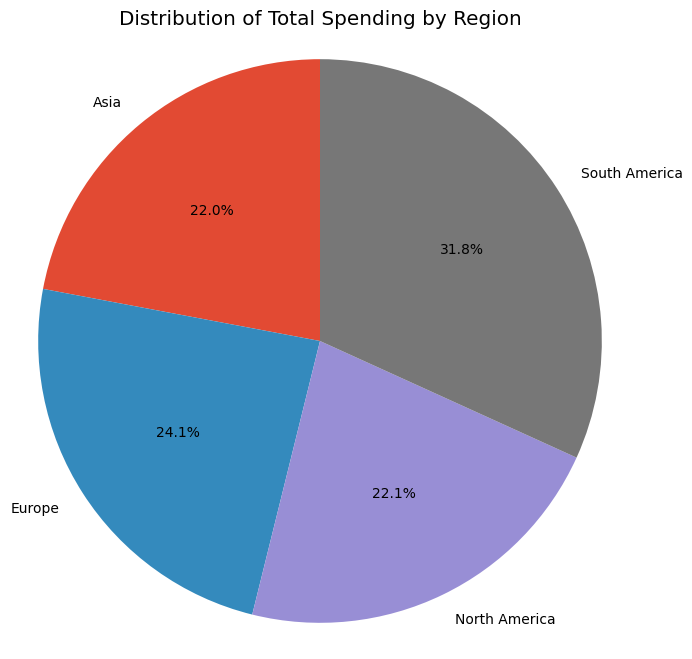

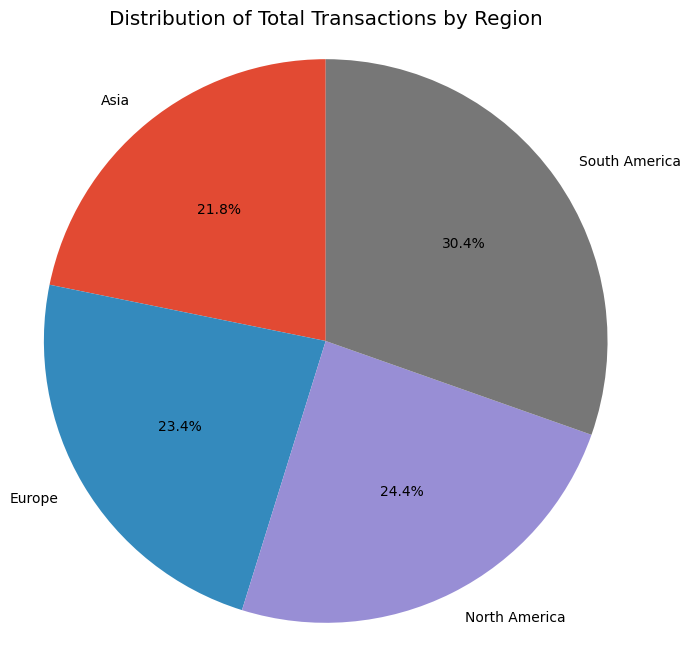

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 8))
plt.pie(df_customers_from_region['Total_Spending'], labels=df_customers_from_region.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Spending by Region')
plt.axis('equal')
plt.show()


plt.figure(figsize=(8, 8))
plt.pie(df_customers_from_region['Total_Transactions'], labels=df_customers_from_region.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Transactions by Region')
plt.axis('equal')
plt.show()

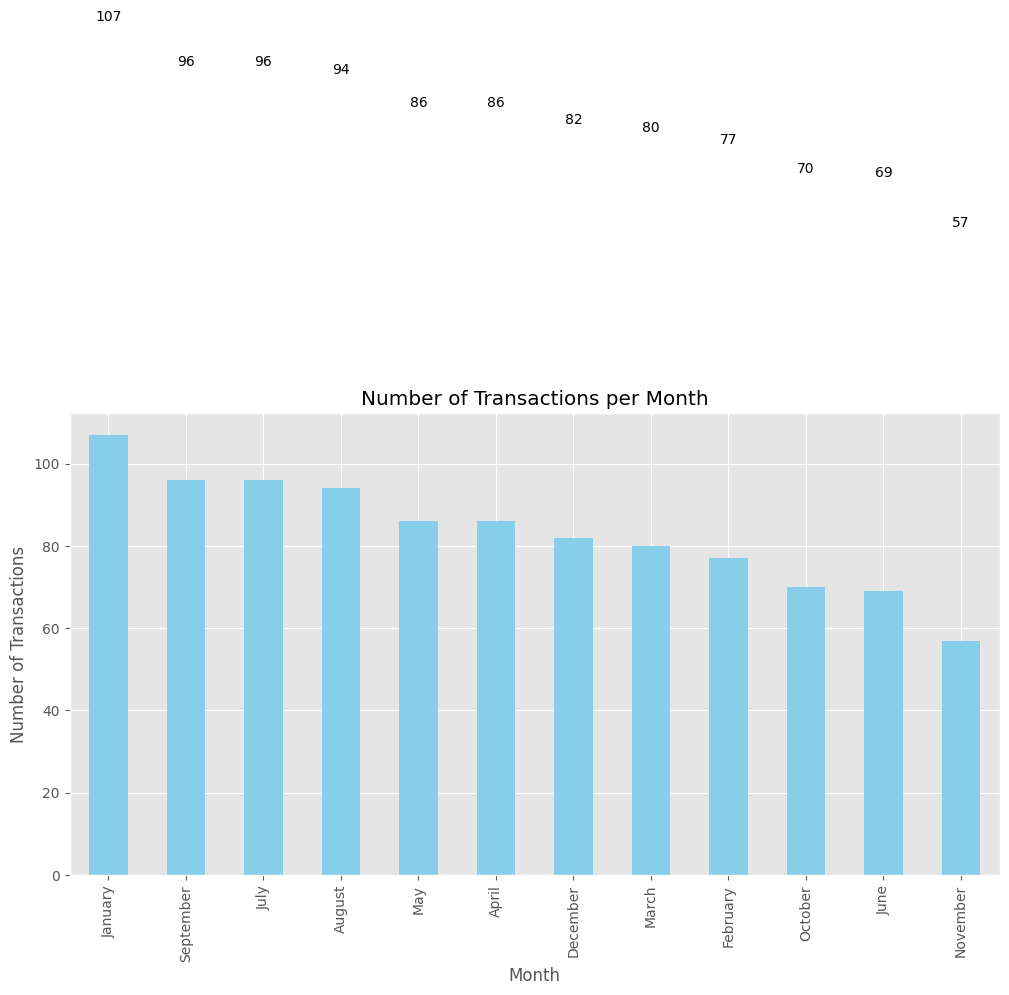

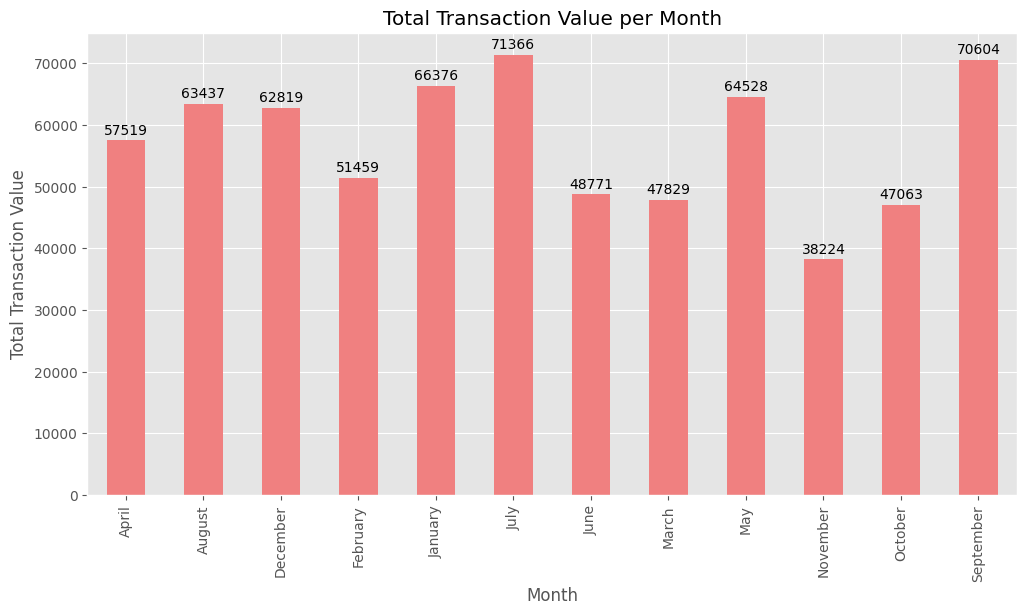

In [ ]:
monthly_transactions = df_transactions['TransactionMonth'].value_counts()

# Create the plot
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='bar', color='skyblue')
plt.title('Number of Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

# Add transaction counts on top of each bar
for i, v in enumerate(monthly_transactions):
    plt.text(i, v + 100, str(v), ha='center', va='bottom')


plt.show()


monthly_transaction_value = df_transactions.groupby('TransactionMonth')['TotalValue'].sum()


# Create the plot
plt.figure(figsize=(12, 6))
monthly_transaction_value.plot(kind='bar', color='lightcoral')
plt.title('Total Transaction Value per Month')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value')

# Add transaction values on top of each bar
for i, v in enumerate(monthly_transaction_value):
    plt.text(i, v + 500, f'{v:.0f}', ha='center', va='bottom')

plt.show()

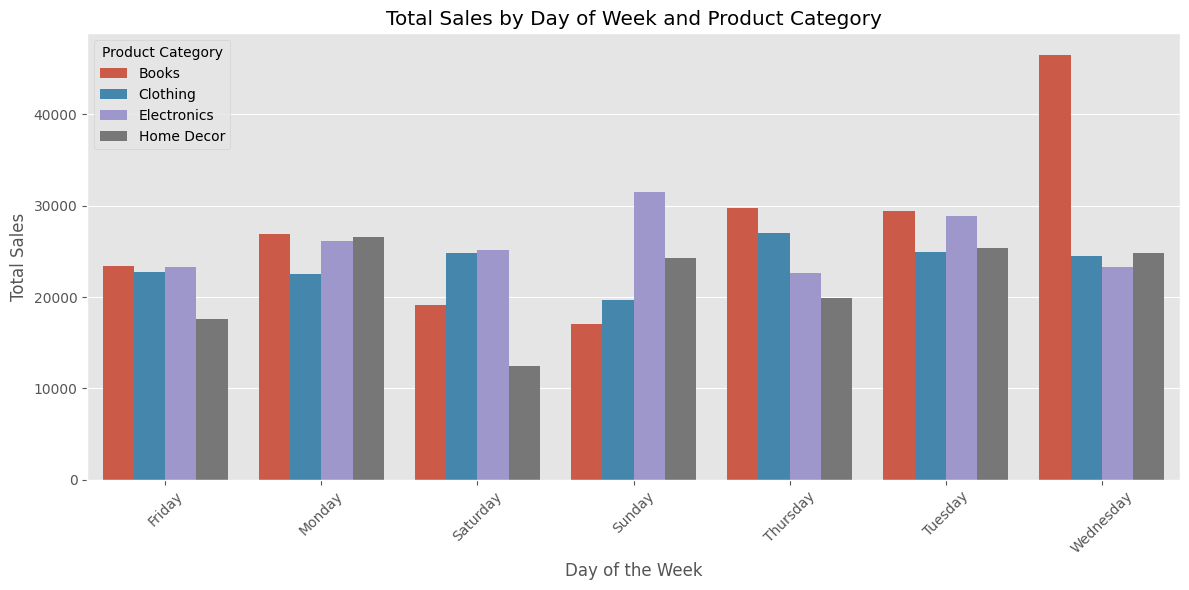

In [ ]:
category_day_sales = df_all.groupby(['TransactionDay', 'Category'])['TotalValue'].sum().reset_index()



plt.figure(figsize=(12, 6))
sns.barplot(x='TransactionDay', y='TotalValue', hue='Category', data=category_day_sales)
plt.title('Total Sales by Day of Week and Product Category')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

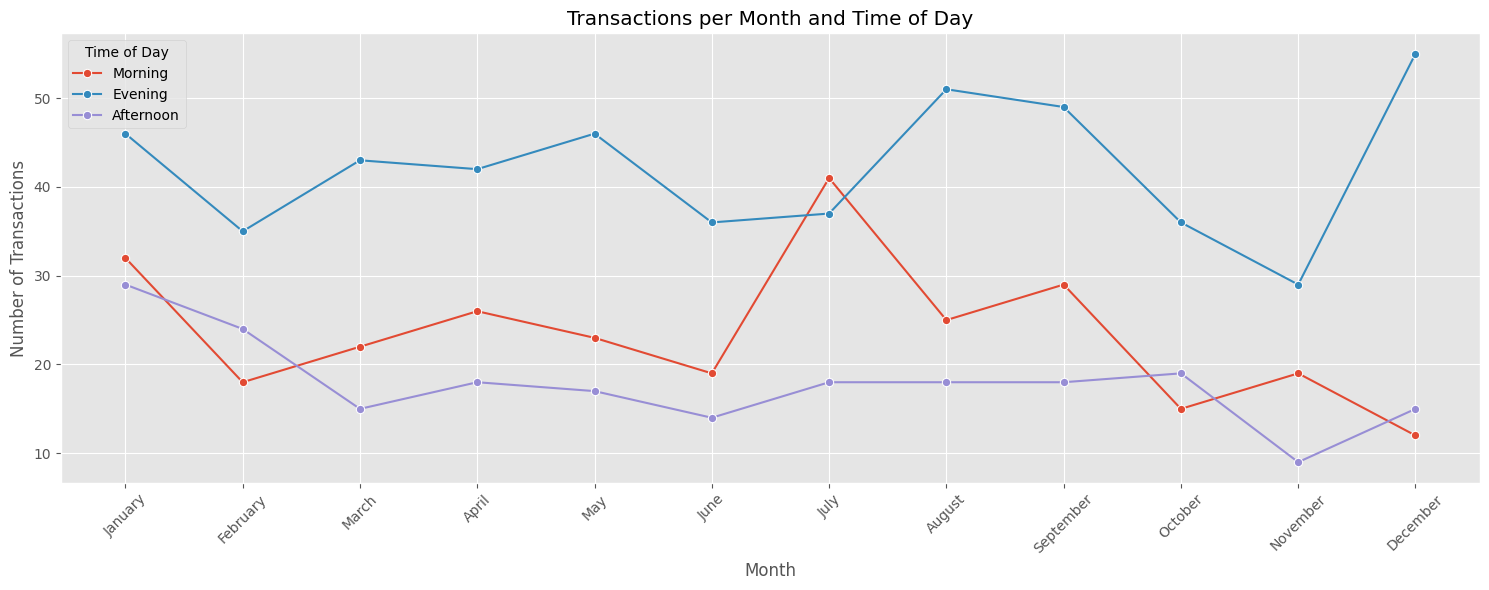

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

transaction_counts = df_transactions.groupby(['TransactionMonth', 'Transaction_TimePeriod'])['TransactionID'].count().reset_index()

# Order months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
transaction_counts['TransactionMonth'] = pd.Categorical(transaction_counts['TransactionMonth'], categories=month_order, ordered=True)
transaction_counts = transaction_counts.sort_values('TransactionMonth')

# Create the plot
plt.figure(figsize=(15, 6))
sns.lineplot(x='TransactionMonth', y='TransactionID', hue='Transaction_TimePeriod', marker='o', data=transaction_counts)
plt.title('Transactions per Month and Time of Day')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

In [ ]:
monthly_category_sales = df_all.groupby(['TransactionMonth', 'Category'])['TotalValue'].sum().reset_index()

# Order months chronologically
monthly_category_sales['TransactionMonth'] = pd.Categorical(monthly_category_sales['TransactionMonth'], categories=month_order, ordered=True)
monthly_category_sales = monthly_category_sales.sort_values('TransactionMonth')

# Create the plot
plt.figure(figsize=(15, 6))
sns.barplot(x='TransactionMonth', y='TotalValue', hue='Category', data=monthly_category_sales)
plt.title('Monthly Variation of Category Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()